In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [50]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [51]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [52]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [53]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [54]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [13]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [31]:
steps=99
def tz_two_q_dyns_map(pops_trial_index,denom): 
    tz = []
    np.array(pops_trial_index)
    for step_index in range(steps):
        tzi =  np.sin(np.pi/denom)*np.sin(np.pi/denom) -2*(pops_trial_index[step_index + 1 ] - np.cos(np.pi / denom)*np.cos(np.pi / denom)* pops_trial_index[step_index])
        tz.append(tzi)
    return tz

In [33]:
tz_two_q_dyns_map(pops[0],15);

In [37]:
num_qubits = 8
def CPcond(pops) :
    list_lambda_z=[]
    CPcond=[]
    for size in range(num_qubits):
        list_lambda_z.append(np.cos(np.pi / denom) * np. cos(np.pi / denom))
    for step in tz_two_q_dyns_map(pops,denom):
        abs_step = [abs(ele) for ele in step]
        CPcond.append(abs_step + list_lambda_z)
    return tz_two_q_dyns_map(pops)

#CPcond(popsgreedy)
def abs_tz(pops,denom):
    abs_tz=[]
    for step in tz_two_q_dyns_map(pops,denom):
        abs_step = [abs(ele) for ele in step]
        abs_tz.append(abs_step) 
    return abs_tz
def CPcond(abs_tz_pops) :
    cp_cond=[]
    for step in abs_tz_pops:
        cp_step = [ele + np.cos(np.pi / denom) * np. cos(np.pi / denom)  for ele in step]
        cp_cond.append(cp_step) 
    return cp_cond

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

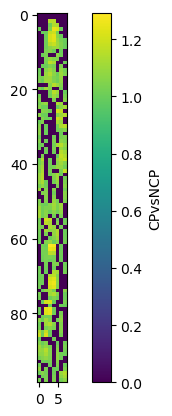

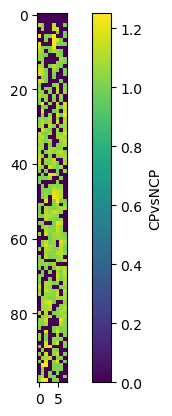

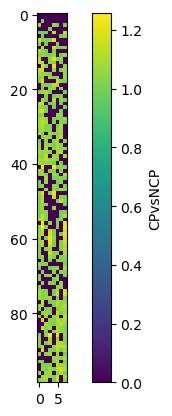

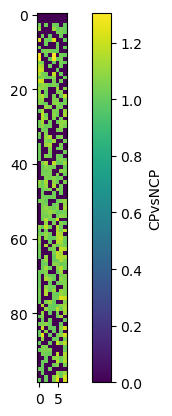

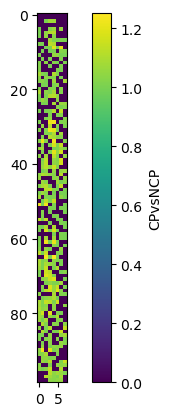

In [39]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
i=0
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('CPvsNCP')
        plt.show()

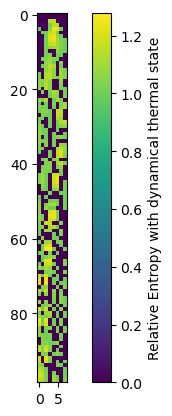

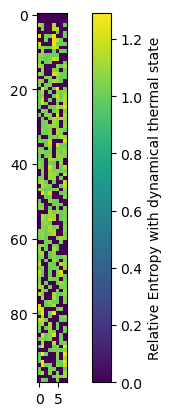

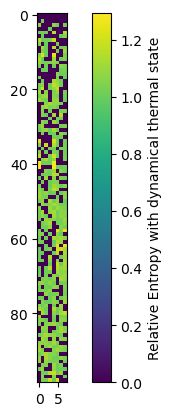

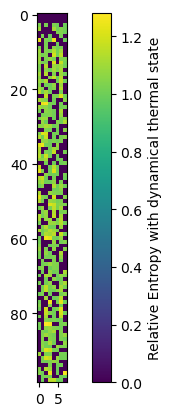

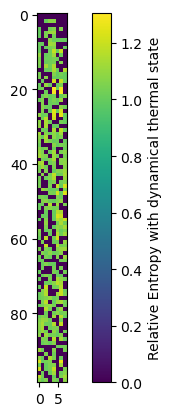

In [42]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('Relative Entropy with dynamical thermal state')
        plt.show()


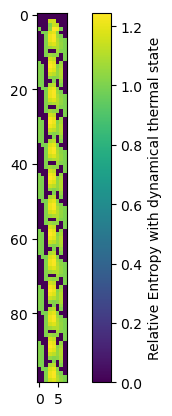

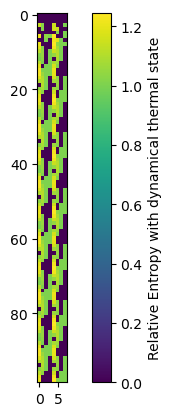

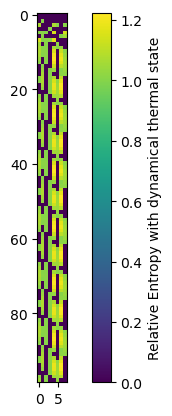

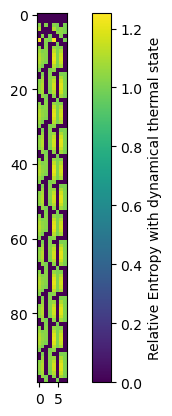

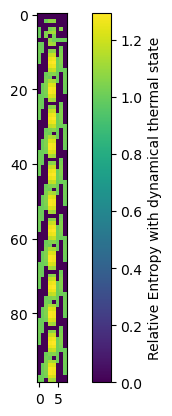

In [43]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('Relative Entropy with dynamical thermal state')
        plt.show()

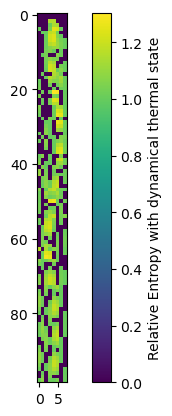

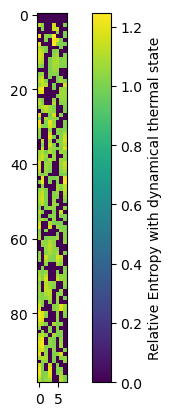

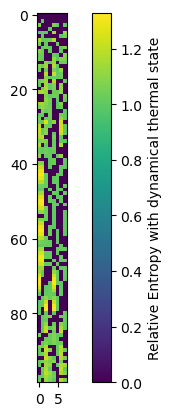

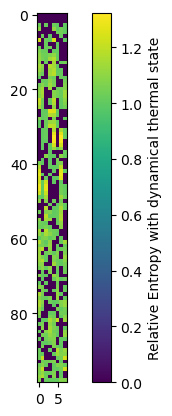

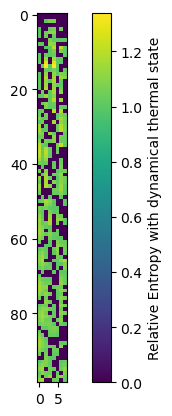

In [44]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('Relative Entropy with dynamical thermal state')
        plt.show()

In [45]:
def means_stds_of_pops_of_one_sim_index(pops_trial_index):
    mean_stds_list = []
    for step_index in range(steps):
        stds = np.std(pops_trial_index [step_index])
        means = np.mean(pops_trial_index[step_index])
        mean_stds_list.append([means, stds])
    return mean_stds_list

def means_stds_mode_of_pops_of_one_sim_index(pops_trial_index):
    mean_stds_mode_list = []
    for step_index in range(steps):
        total = sum(pops_trial_index[step_index])
        stds = np.std(pops_trial_index[step_index])
        means = np.mean(pops_trial_index[step_index])
        mode = max(pops_trial_index[step_index])
        mean_stds_mode_list.append([total,stds,means,mode])
    return mean_stds_mode_list

def extract_total(list_of_lists):
    return [sublist[0] for sublist in list_of_lists]
def extract_stds(list_of_lists):
    return [sublist[1] for sublist in list_of_lists]
def extract_means(list_of_lists):
    return [sublist[2] for sublist in list_of_lists]
def extract_mode(list_of_lists):
    return [sublist[3] for sublist in list_of_lists]

In [46]:
def moving_average(data, window_size=10):
    """
    Function to calculate the moving average of a given data array.
    
    Parameters:
    - data: The input data array.
    - window_size: The size of the moving average window.
    
    Returns:
    - moving_avg: The moving average array.
    """
    moving_avg = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    return moving_avg

def plot_four_stats_as_function_of_time(list1, list2, list3,list4, filename='plot.png',title='plotname'):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    moving_avg_list4 = moving_average(list4)
    
    # Set the figure size (adjust as needed)
    plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, color='blue', label='Random')
    plt.plot(time_steps, list2,color='orange', label='Greedy')
    plt.plot(time_steps, list3, color='red',label='Mimic')
    plt.plot(time_steps, list4, color='green',label='Landmax')
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='red', label='Moving Average (Mimic)')
    plt.plot(time_steps[len(list4) - len(moving_avg_list4):], moving_avg_list4, linestyle='--', color='green', label='Moving Average (Landmax)')    
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(title)
    
    # Adding legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    
    # Display the plot
    plt.grid(True)
    
    # Save the plot with the desired filename
    #plt.savefig(filename)
    
    # Show the plot (optional)
    plt.show()

def plot_four_stats_as_function_of_time_avg(list1, list2, list3,list4, filename='plot.png',title='plotname'):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    moving_avg_list4 = moving_average(list4)
    
    # Set the figure size (adjust as needed)
    plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches
    
    # Plotting the lists and their moving averages
    #plt.plot(time_steps, list1, color='blue', label='Random')
#    plt.plot(time_steps, list2,color='orange', label='Greedy')
    #plt.plot(time_steps, list3, color='green',label='Land_max')
    #plt.plot(time_steps, list4, color='red',label='Mimic')
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='red', label='Moving Average (Mimic)')
    plt.plot(time_steps[len(list4) - len(moving_avg_list4):], moving_avg_list4, linestyle='--', color='green', label='Moving Average (Landmax)')    
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(title)
    
    # Adding legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    
    # Display the plot
    plt.grid(True)
    
    # Save the plot with the desired filename
   # plt.savefig(filename)
    
    # Show the plot (optional)
    plt.show()

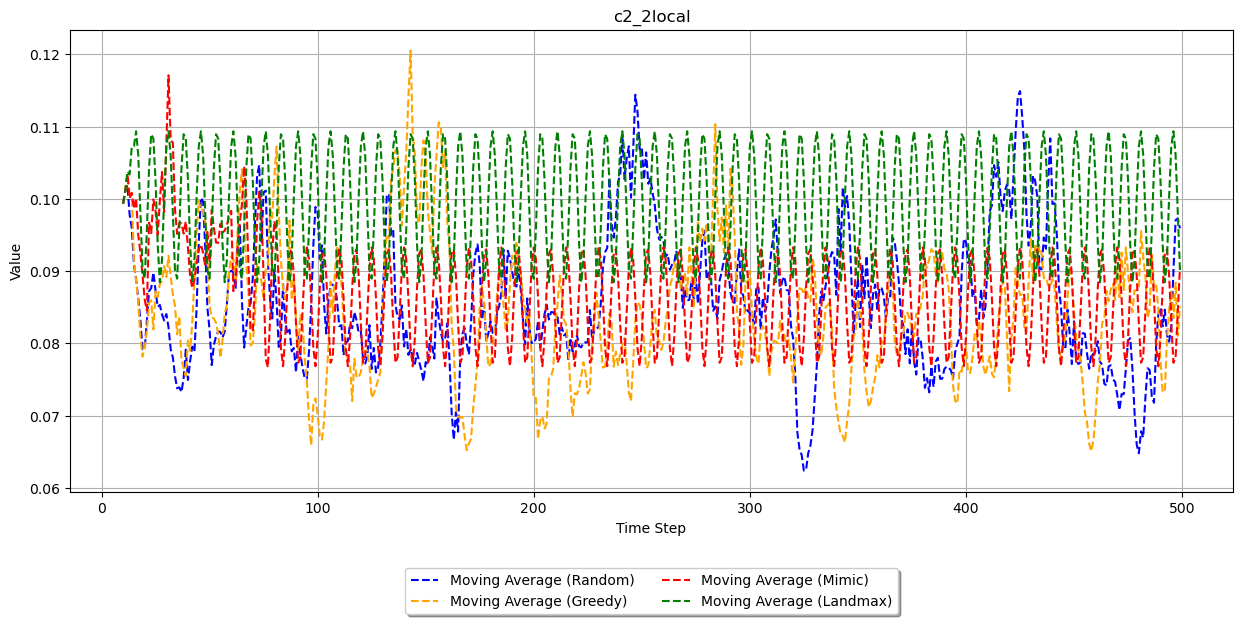

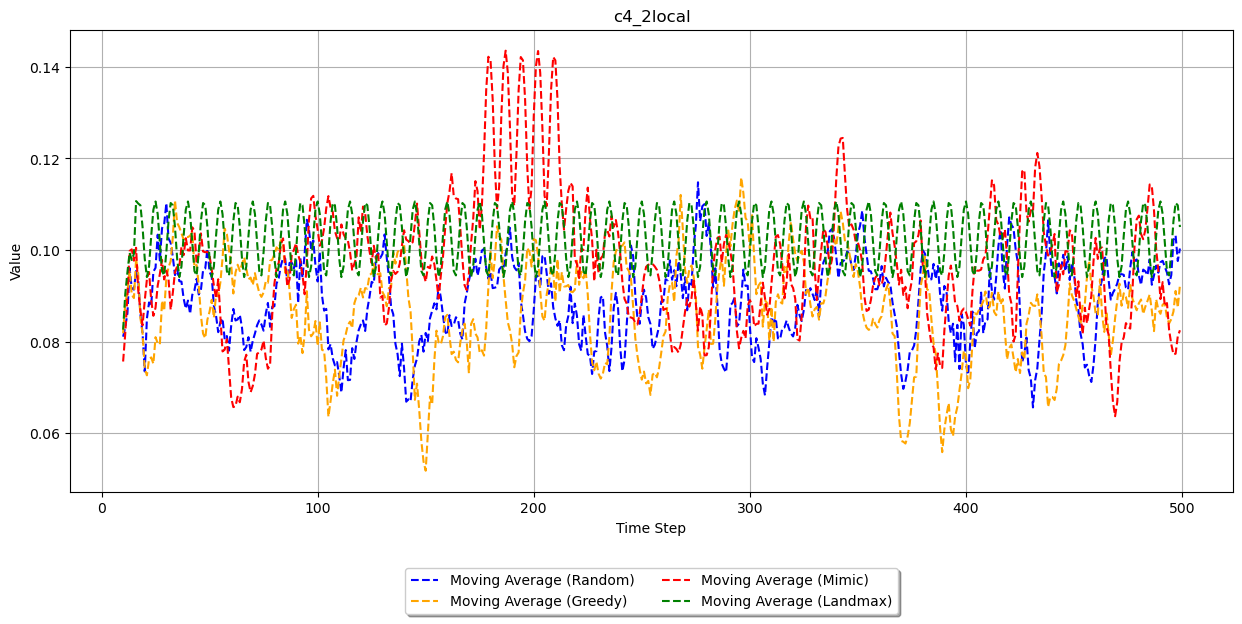

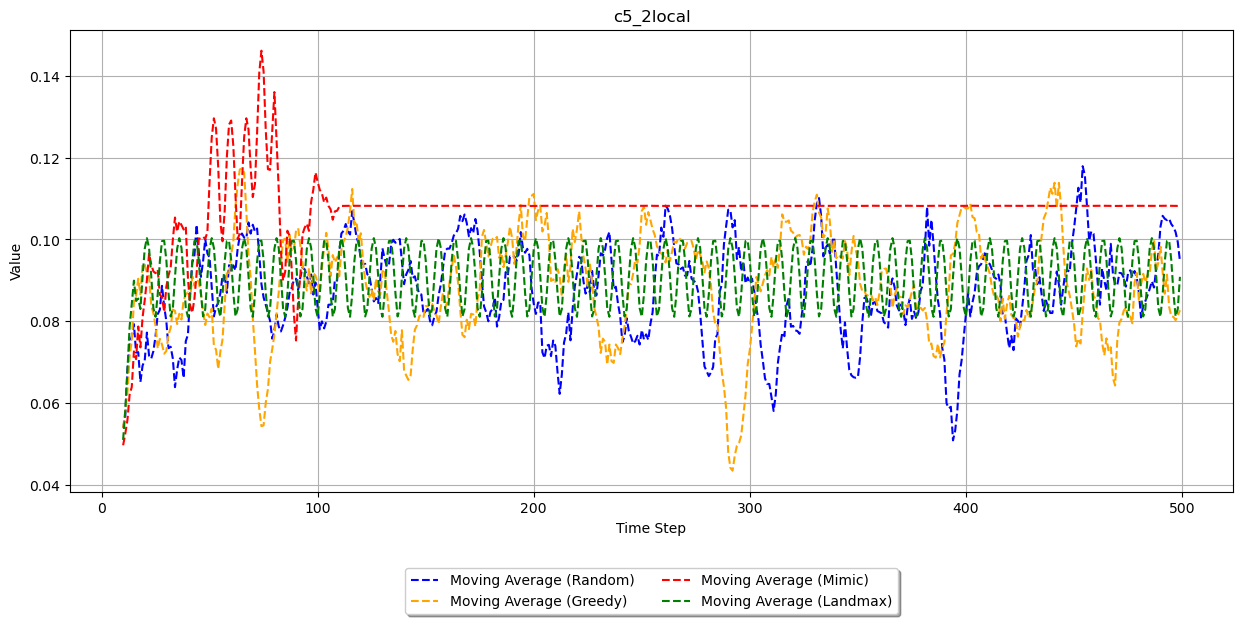

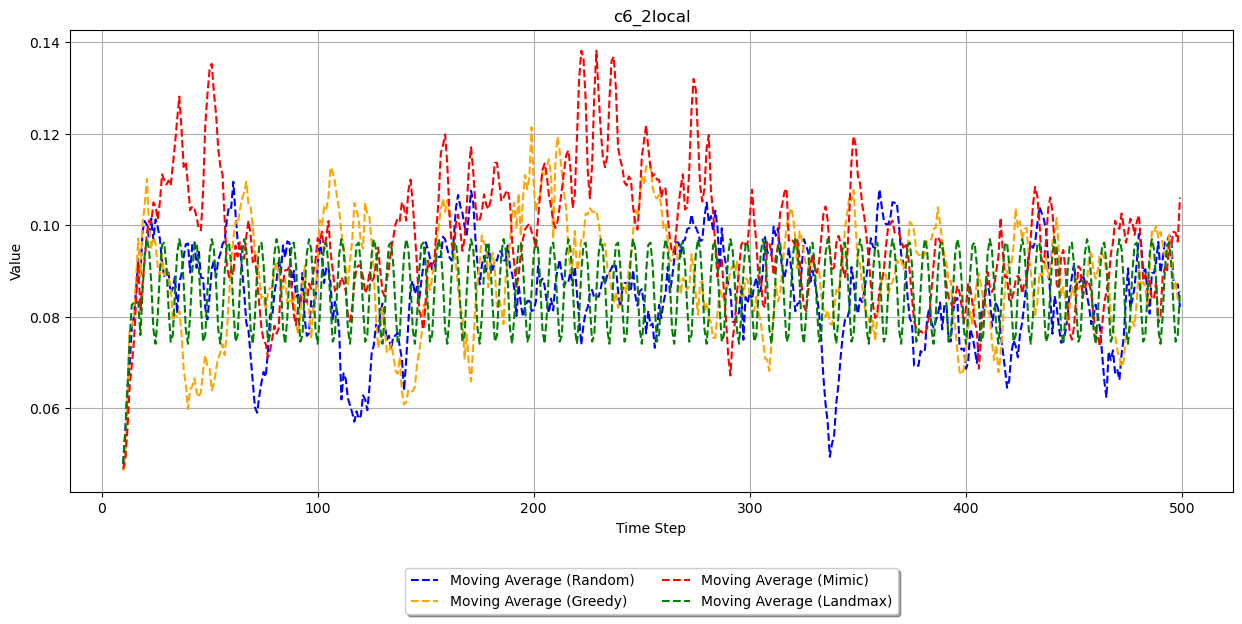

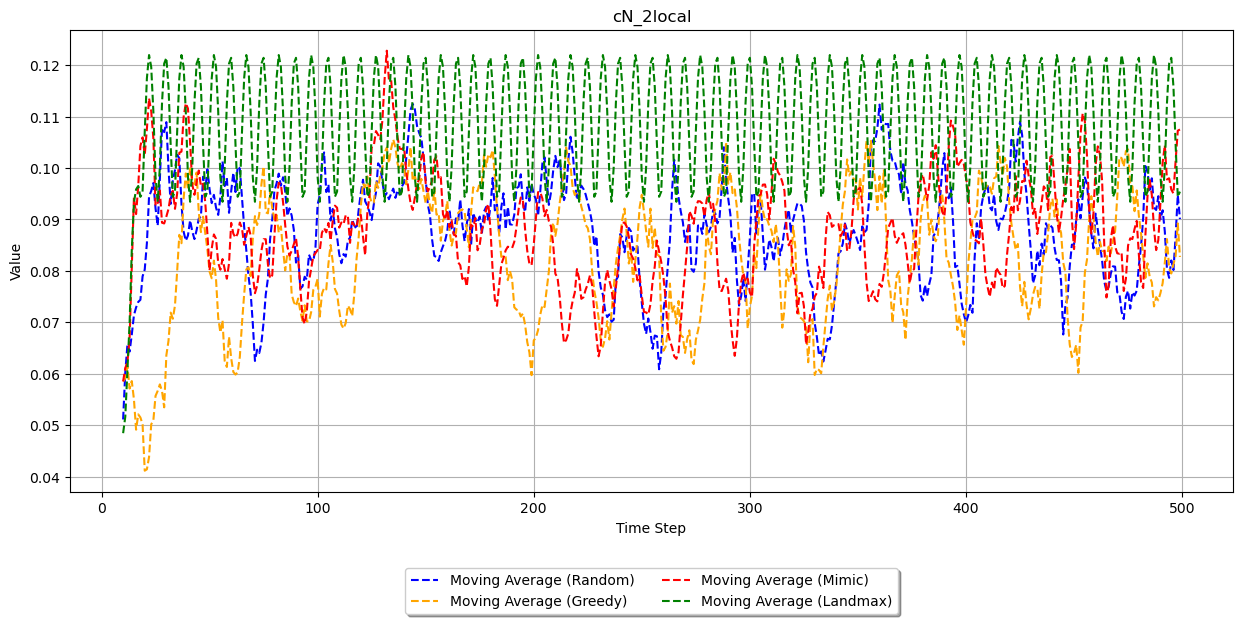

In [49]:
steps=499
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
size=[8]
for size in sizes:
    for conn in list_conn:
        pops_random = get_pops(newdata1,size,conn,"random")
        pops_greedy = get_pops(newdata2,size,conn,"greedy")
        pops_mimic = get_pops(newdata3,size,conn,"mimic")
        pops_landmax = get_pops(newdata4,size,conn,"landscape_maximizes")
        
        stds_random=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_random[0],denom)))
        stds_greedy=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_greedy[0],denom)))
        stds_mimic=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_mimic[0],denom)))
        stds_landmax=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_landmax[0],denom)))
        
        plot_four_stats_as_function_of_time_avg(stds_random,stds_greedy, stds_mimic,stds_landmax,filename = 'tz_stds_random_greedy_landmax_temp_homo',title = conn)


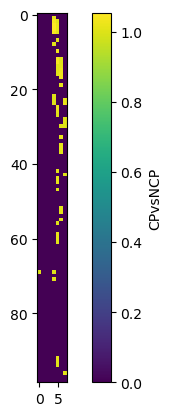

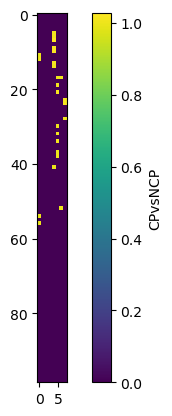

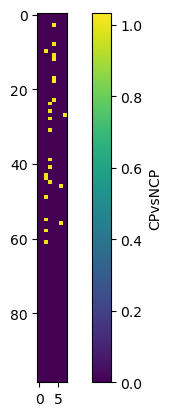

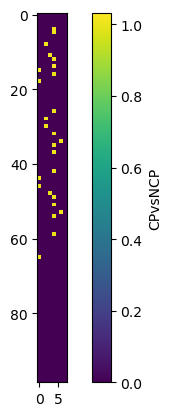

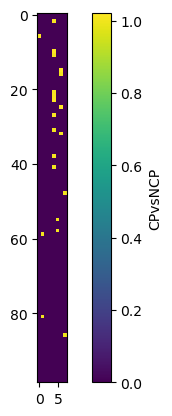

In [56]:
steps = 99
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
i=0
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('CPvsNCP')
        plt.show()

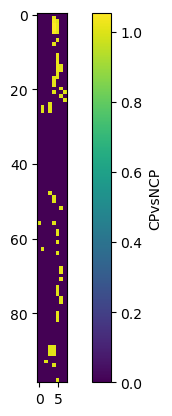

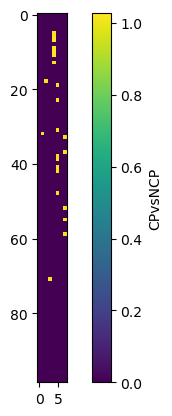

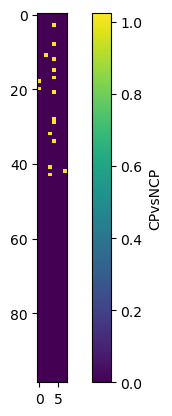

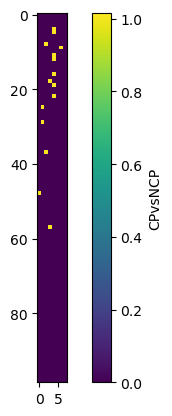

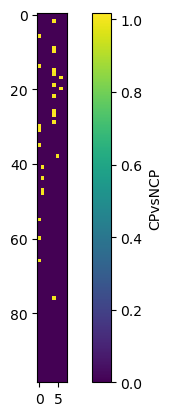

In [57]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
i=0
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('CPvsNCP')
        plt.show()

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.015048502942585, 0, 0, 0], [0, 0, 0, 0, 1.0403013816085092, 1.0057196607794991, 0, 0], [0, 0, 0, 0, 1.0541011085715524, 1.0195194175448647, 0, 0], [0, 0, 0, 0, 1.054061650296711, 1.0194798400607339, 0, 0], [0, 0, 0, 0, 1.0401897123065225, 1.005608110686802, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1.0119603266921273, 0, 0], [0, 0, 0, 0, 1.009561180135273, 0, 0, 0], [0, 0, 0, 0, 0, 1.0361632099356881, 1.0010388186183206, 0], [0, 0, 0, 0, 0, 1.0509746661391488, 1.015850334426426, 0], [0, 0, 0, 0, 0, 1.0525345196929208, 1.017410187980198, 0], [0, 0, 0, 0, 0, 1.040572791358494, 1.0054485490527383, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1.0146030178275338, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.00659650470879, 0], [0, 0, 0, 0, 0, 0, 1.0230723014083138, 0], [0, 0, 0, 0, 0, 1.0007649650779, 1.038400053044819, 0], [0, 0, 0, 0, 0, 0, 1.0079263439383737, 0], [0, 0, 0, 0, 0, 0, 1.0370347788539163, 0]

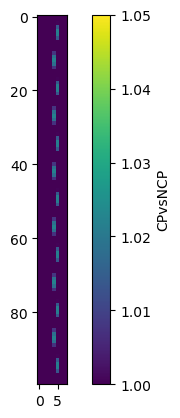

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0099084367957345, 0, 0, 0], [0, 0, 0, 0, 1.010766266843342, 0, 0, 0], [0, 0, 0, 0, 1.0286782970633737, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0006610145774117, 0, 0, 0], [0, 0, 0, 0, 1.0036004176345101, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.000043301841282, 0, 0, 0], [0, 0, 0, 0, 1.002162544986271, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0097196986880532, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1.0033961227145425, 0, 0, 0, 0, 0, 0, 0], [1.0039182296004525, 0, 0, 0, 0, 0, 0, 0], [1.0000263741221658, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1.0014779558387032, 0, 0, 0, 0,

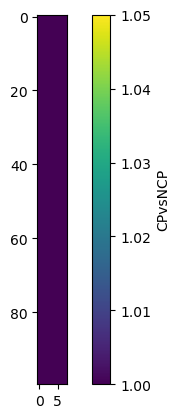

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0136814704146615, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0092923035826913, 0, 0, 0], [0, 0, 0, 0, 1.0292829265799752, 0, 0, 0], [0, 0, 1.0019955923762551, 0, 1.0400236835685006, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1.002884208222889, 0, 0, 0, 0, 0], [0, 0, 1.011174677869343, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0206082453932992, 0, 0, 0], [0, 0, 1.0184114566054574, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0029358258452645, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.0140545060839883, 0], [0, 0, 1.0146249523368112, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.0140545060839883, 0], [0, 0, 1.0146249821391335, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.0101645579543344, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.006326465865635, 0], [0, 0, 1.0058702817168466, 0, 0, 0, 0, 0], [0, 0, 0, 0

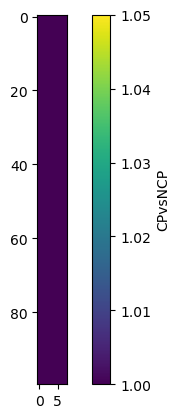

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.011312364598774, 0, 0, 0], [0, 0, 0, 0, 1.0095430007186166, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1.0129959275927773, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.03206276800301, 0, 0, 0], [0, 0, 0, 1.0014390042033425, 1.0396164050307504, 0, 0, 0], [0, 0, 0, 0, 1.0361463120188943, 0, 0, 0], [0, 0, 0, 0, 1.022252409717106, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1.0082904091086617, 0, 0, 0, 0], [0, 0, 0, 1.0227342238631478, 0, 0, 0, 0], [0, 0, 0, 1.0291065564360848, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1.0025589158740273, 0, 0, 1.0077560534682504, 0], [0, 0, 0, 0, 1.0017452826705209, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.007646947165989, 0], [0, 0, 1.0074272742476693, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.0010027876105538, 0], [0, 0, 0, 1.0

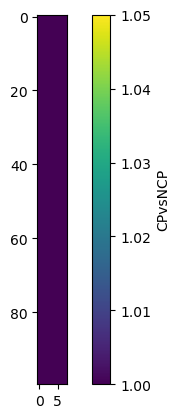

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0136505952086678, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1.01827344205048, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0110291233268014, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0320684900489083, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.007472991010212, 0, 0, 0], [0, 0, 0, 0, 1.0174791803565255, 0, 0, 0], [1.0102694919314614, 0, 0, 0, 0, 0, 0, 0], [1.0165937235560647, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0266345133986703, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1.0011222353186837, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.000533192416691, 0, 0, 0], [0, 0, 1.0047599365916482, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.0035549392905465, 0], [0, 0, 1.003242491742634, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.0035549988951913,

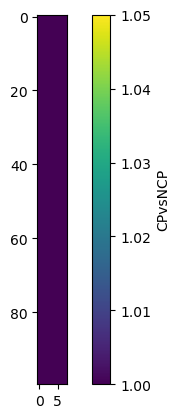

In [72]:
steps=499
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
i=0
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
        print (fulllist)
                
     
        plt.imshow(fulllist[399:499], interpolation='none', vmin=1, vmax=1.05)
        # Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('CPvsNCP')
        plt.show()


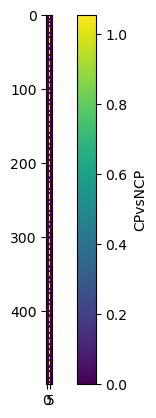

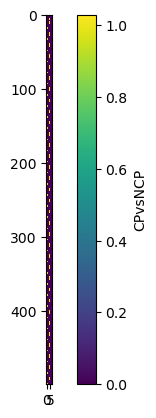

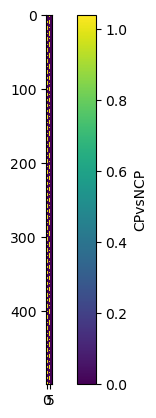

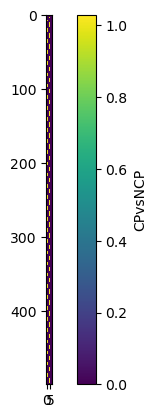

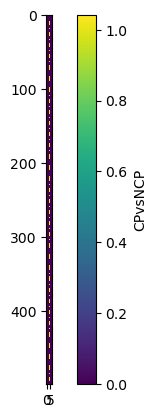

In [61]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
i=0
sizes=[8]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")    
        fulllist=[]
        for timestep in CPcond(abs_tz(pops[i],denom)):
            timesteplist=[]
            for ele in timestep:
                if ele<1:
                    ele=0
                timesteplist.append(ele)
            #print(timesteplist)
            fulllist.append(timesteplist)
                
     
        plt.imshow(fulllist, interpolation='none')
        #Add a color bar with a label
        cbar = plt.colorbar()
        cbar.set_label('CPvsNCP')
        plt.show()

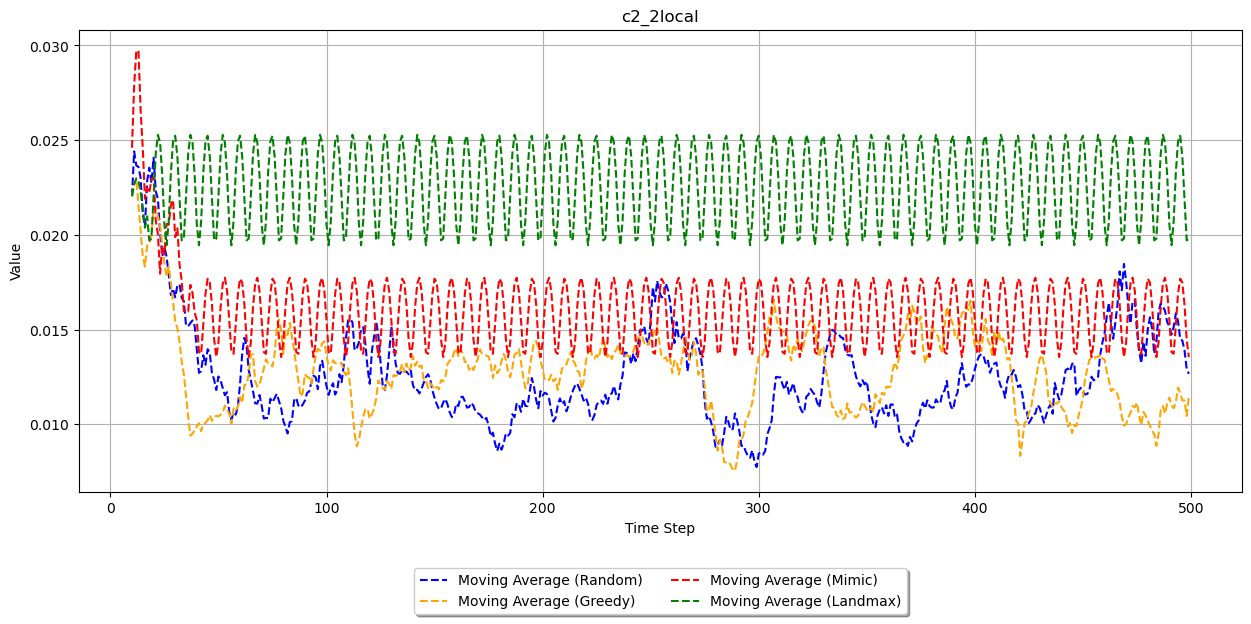

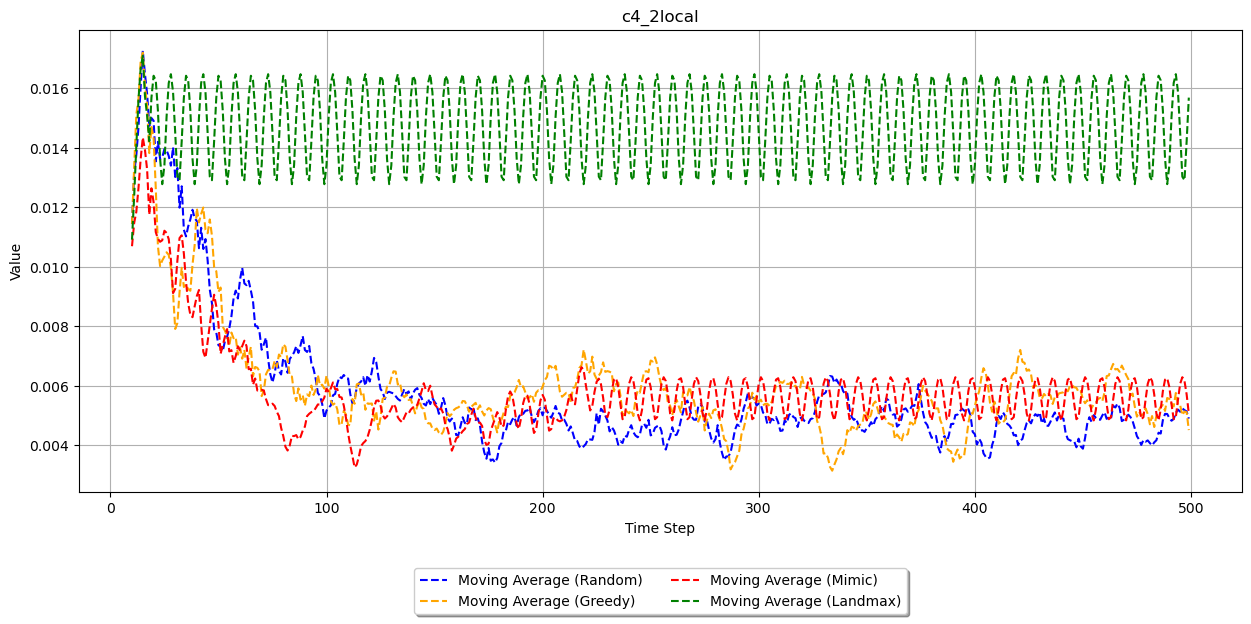

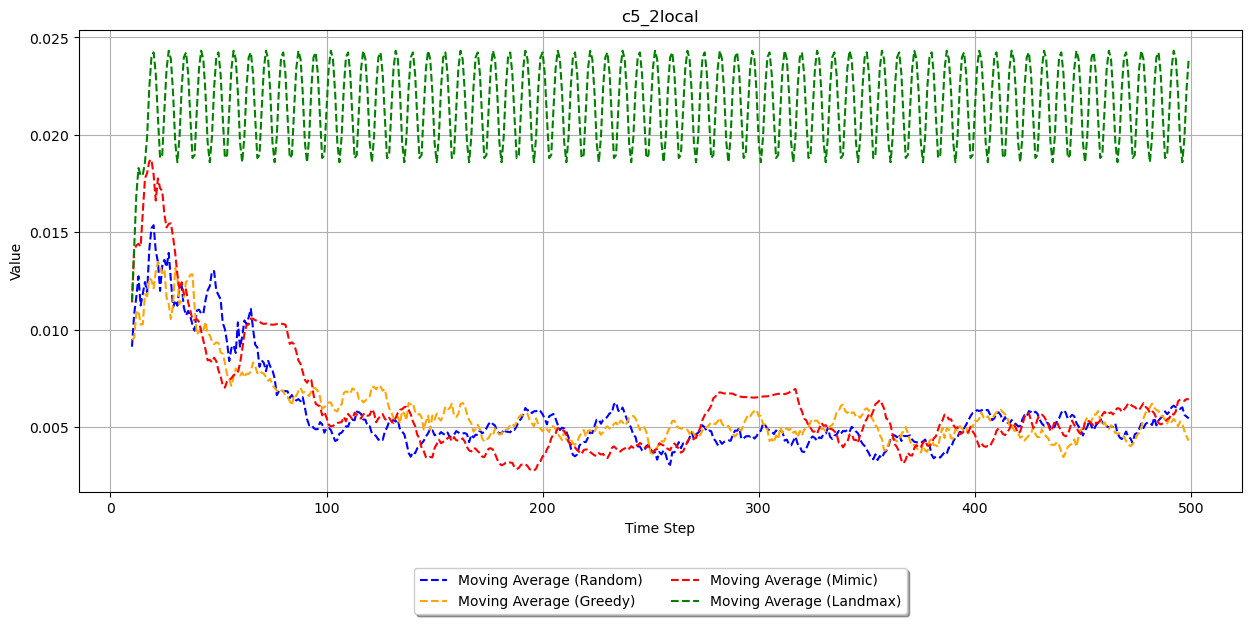

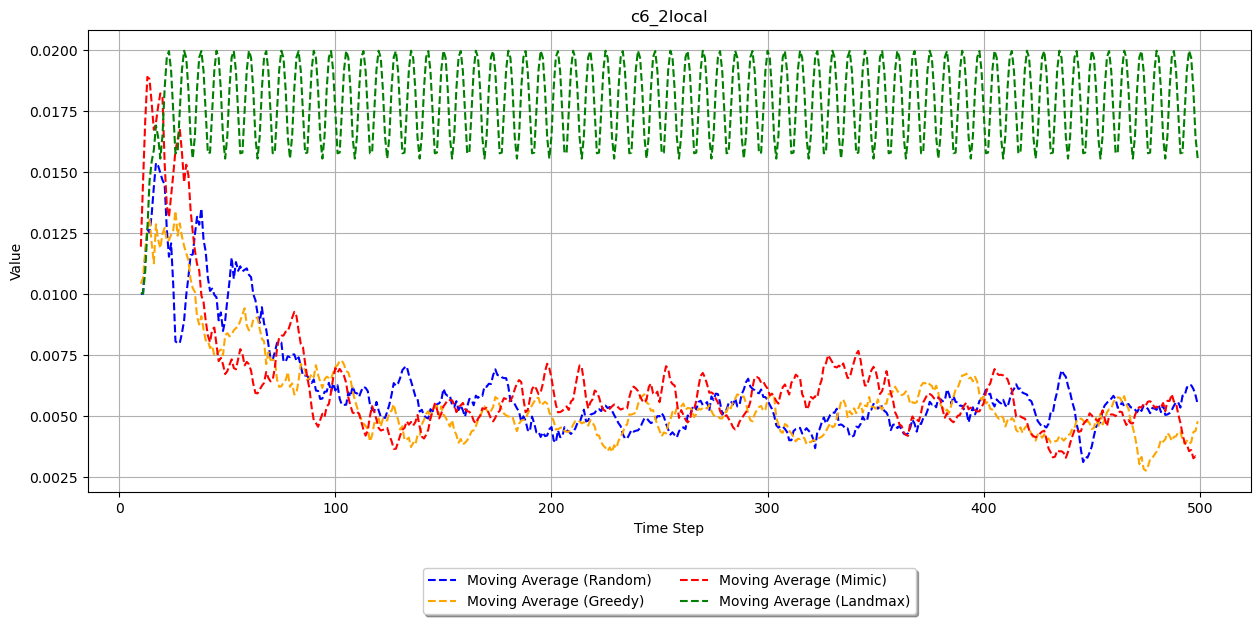

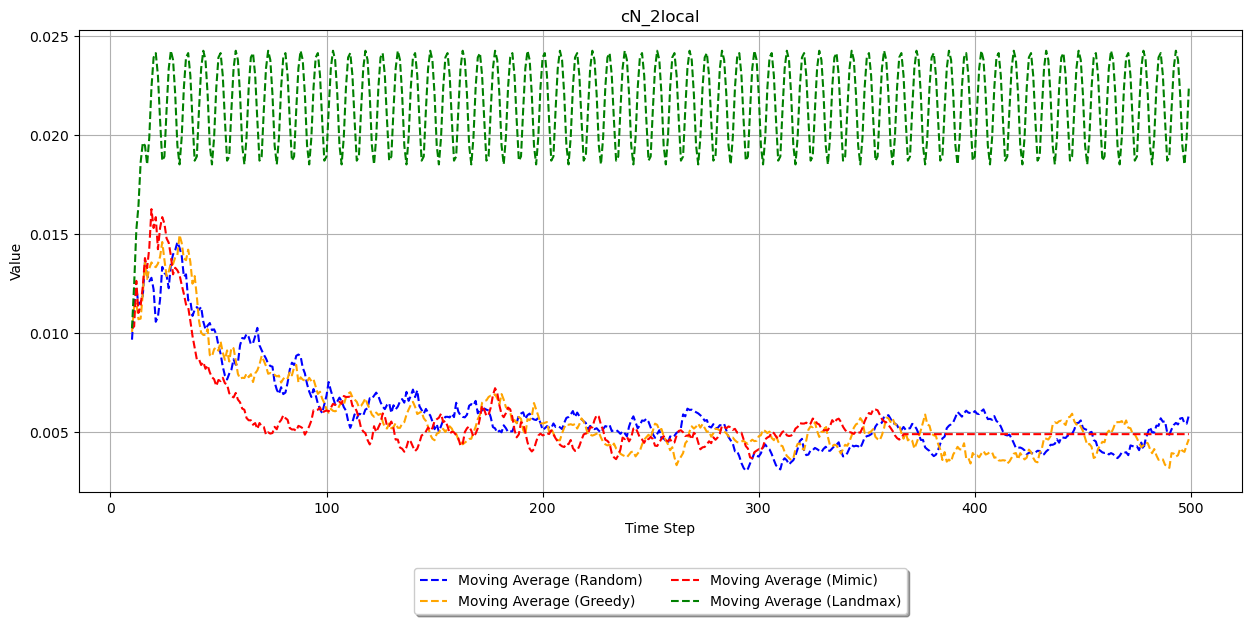

In [60]:
steps=499
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
size=[8]
for size in sizes:
    for conn in list_conn:
        pops_random = get_pops(newdata1,size,conn,"random")
        pops_greedy = get_pops(newdata2,size,conn,"greedy")
        pops_mimic = get_pops(newdata3,size,conn,"mimic")
        pops_landmax = get_pops(newdata4,size,conn,"landscape_maximizes")
        
        stds_random=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_random[0],denom)))
        stds_greedy=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_greedy[0],denom)))
        stds_mimic=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_mimic[0],denom)))
        stds_landmax=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_landmax[0],denom)))
        
        plot_four_stats_as_function_of_time_avg(stds_random,stds_greedy, stds_mimic,stds_landmax,filename = 'tz_stds_random_greedy_landmax_temp_homo',title = conn)


In [23]:
twoQdmsrandom = get_2_qbit_dms(newdata1,8,"c4_2local","random")
twoQdmsgreedy = get_2_qbit_dms(newdata2,8,"c4_2local","greedy")
twoQdmsmimic = get_2_qbit_dms(newdata3,8,"c4_2local","mimic")
twoQdmslandscape_max = get_2_qbit_dms(newdata4,8,"c4_2local","landscape_maximizes")


In [24]:
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix

In [25]:
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix_two_dim(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

In [ ]:
rules=["random","greedy","landscape_maximizes","mimic"]
conns = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
for conn in conns:
    for rule in rules:
        for unitary_seed in range(1):
            initial_pops = [.01,.01, .01, .45, .01, .01, .01, .01]
            system = DM.n_thermal_qbits(initial_pops)
            connectivity = conn
            unitary_energy_subspace = 1
            ordering_seed = 1
            chunk_size = 2
            order_rule_name = rule
            num_steps = 500
            data = cleo.execute(file_name=rule,
                               connectivity=connectivity,
                               order_rule_name = order_rule_name, 
                               unitary_seed=unitary_seed,
                               unitary_energy_subspace=unitary_energy_subspace,
                               evolution_generation_type="haar2Qunitary",
                               chunk_size=chunk_size,
                               num_steps=num_steps,
                               initial_pops=initial_pops,
                               verbosity = .9)